In [1]:
%matplotlib widget
import traji
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interactive_output, FloatSlider, VBox, HBox, Checkbox

Output()

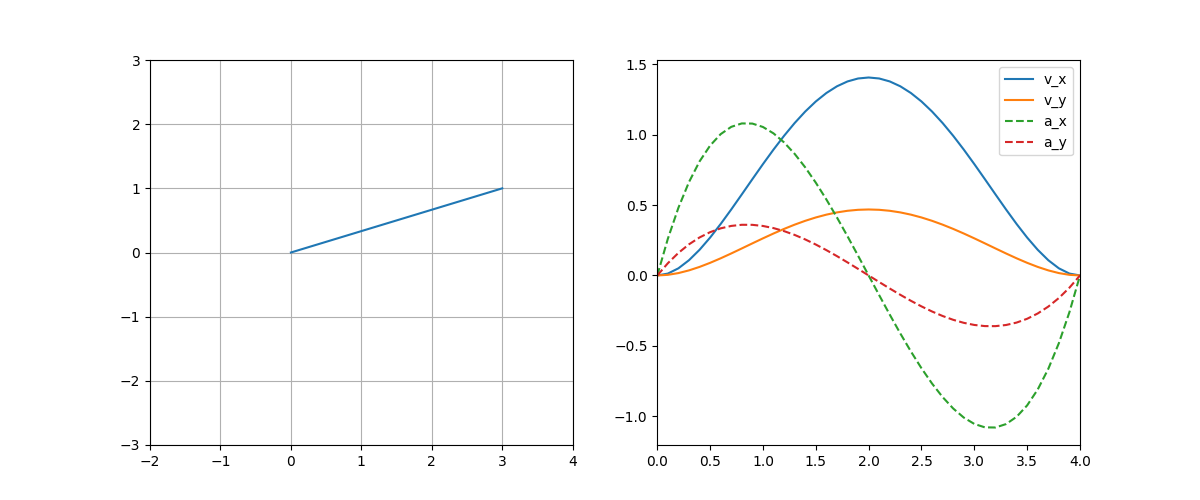

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

common = dict(step=0.1)
s_x0  = FloatSlider(0., min= 0., max=4., description=" x0", **common)
s_vx0 = FloatSlider(0., min=-2., max=2., description="vx0", **common)
s_ax0 = FloatSlider(0., min=-1., max=1., description="ax0", **common)
s_xt  = FloatSlider(3., min= 0., max=4., description=" xt", **common)
s_vxt = FloatSlider(0., min=-2., max=2., description="vxt", **common)
s_axt = FloatSlider(0., min=-1., max=1., description="axt", **common)
s_y0  = FloatSlider(0., min=-2., max=2., description=" y0", **common)
s_vy0 = FloatSlider(0., min=-2., max=2., description="vy0", **common)
s_ay0 = FloatSlider(0., min=-1., max=1., description="ay0", **common)
s_yt  = FloatSlider(1., min=-2., max=2., description=" yt", **common)
s_vyt = FloatSlider(0., min=-2., max=2., description="vyt", **common)
s_ayt = FloatSlider(0., min=-1., max=1., description="ayt", **common)
s_T = FloatSlider(0., min=4., max=6., description="T", **common)
c_relax = Checkbox(False, description="relax x_s")

def generate(x0, vx0, ax0, xt, vxt, axt,
             y0, vy0, ay0, yt, vyt, ayt,
             T, relax):
    qtraj = traji.QuinticPolyTrajectory(T,
        [x0, vx0, ax0], [xt, vxt, axt], [y0, vy0, ay0], [yt, vyt, ayt],
        relax_sx = relax
    )
    traj = qtraj.periodize(0.1)

    ax1.clear()
    ax1.set_xlim([-2, 4])
    ax1.set_ylim([-3, 3])
    ax1.grid(True)
    traj_arr = np.array(traj)
    ax1.plot(traj_arr[:,0], traj_arr[:,1])

    l_v, l_a = [], []
    for t in traj.timestamps:
        vel = qtraj.velocity_at(t)
        accel = qtraj.acceleration_at(t)
        l_v.append(vel)
        l_a.append(accel)
    l_v = np.array(l_v)
    l_a = np.array(l_a)
    
    ax2.clear()
    ax2.set_xlim([0, T])
    ax2.plot(traj.timestamps, l_v[:,0], label="v_x")
    ax2.plot(traj.timestamps, l_v[:,1], label="v_y")
    ax2.plot(traj.timestamps, l_a[:,0], "--", label="a_x")
    ax2.plot(traj.timestamps, l_a[:,1], "--", label="a_y")
    ax2.legend()

iout = interactive_output(generate, dict(
    x0=s_x0, vx0=s_vx0, ax0=s_ax0, xt=s_xt, vxt=s_vxt, axt=s_axt,
    y0=s_y0, vy0=s_vy0, ay0=s_ay0, yt=s_yt, vyt=s_vyt, ayt=s_ayt, T=s_T, relax=c_relax))
display(VBox([HBox([
    VBox([s_x0, s_vx0, s_ax0]),
    VBox([s_xt, s_vxt, s_axt]),
    VBox([s_y0, s_vy0, s_ay0]),
    VBox([s_yt, s_vyt, s_ayt])
]), HBox([s_T, c_relax])]), iout)